<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:30px;color:white"><u>This Week Questions</u>
    
<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 1:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Find a feature with missing values. How many missing values does it have?</li>
</ul>   

<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 2:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>What's the median (50% percentile) for variable 'minimum_nights'?</li>
</ul>    
    

<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 3:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>We need to deal with missing values for the column from Q1.</li>
<li>We have two options: fill it with 0 or with the mean of this variable.</li>
<li>Try both options. For each, train a linear regression model without regularization using the code from the lessons.</li>
<li>For computing the mean, use the training only!</li>
<li>Use the validation dataset to evaluate the models and compare the RMSE of each option.</li>
<li>Round the RMSE scores to 2 decimal digits using round(score, 2)</li>
<li>Which option gives better RMSE?</li>
</ul> 
    
<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 4:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Now let's train a regularized linear regression.</li>
<li>For this question, fill the NAs with 0.</li>
<li>Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].</li>
<li>Use RMSE to evaluate the model on the validation dataset.</li>
<li>Round the RMSE scores to 2 decimal digits.</li>
<li>Which r gives the best RMSE?</li>
</ul>    
    
    
<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 5:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.</li>
<li>Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].</li>
<li>For each seed, do the train/validation/test split with 60%/20%/20% distribution.</li>
<li>Fill the missing values with 0 and train a model without regularization.</li>
<li>For each seed, evaluate the model on the validation dataset and collect the RMSE scores.</li>
<li>What's the standard deviation of all the scores? To compute the standard deviation, use np.std.</li>
<li>Round the result to 3 decimal digits (round(std, 3)).</li>
</ul>     
    
<ul style="font-family:cursive;font-size:15px;color:  white">Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.</ul>    

<p style="font-family:cursive;font-size:15px;color:  yellow"><u>Question 6:</u></p>
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Split the dataset like previously, use seed 9.</li>
<li>Combine train and validation datasets.</li>
<li>Fill the missing values with 0 and train a model with r=0.001.</li>
<li>What's the RMSE on the test dataset?</li>
</ul>

</div>


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Importing Libraries</div>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Loading and Reading Data </div>

In [175]:
r_data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!wget $r_data -O data-week-3.csv

data = pd.read_csv('data-week-3.csv')
data.head()



--2021-09-27 12:54:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>]   6.75M  --.-KB/s    in 0.09s   

2021-09-27 12:54:08 (77.8 MB/s) - ‘data-week-3.csv’ saved [7077973/7077973]



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Features used for this Project</div>

In [176]:
features  = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df = data[features]
"""Checking description of this project's data set"""
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Missing Values? Impute them with 0</div>

In [177]:
from IPython.display import display
missing_vals = df.isnull().sum()
print("Before Imputing Missing Values")
display(missing_vals.to_frame().reset_index().rename({'index': 'Variables', 0: 'Missing Values'}, axis = 1).sort_values(by = 'Missing Values', ascending = False).style.background_gradient('Reds'))


df.fillna(0, inplace = True)
print("After Imputing Missing Values")
display(df.isnull().sum().to_frame().reset_index().rename({'index': 'Variables', 0: 'Missing Values'}, axis = 1).style.background_gradient('Reds'))


Before Imputing Missing Values


,Variables,Missing Values
7,reviews_per_month,10052
0,neighbourhood_group,0
1,room_type,0
2,latitude,0
3,longitude,0
4,price,0
5,minimum_nights,0
6,number_of_reviews,0
8,calculated_host_listings_count,0
9,availability_365,0


After Imputing Missing Values


,Variables,Missing Values
0,neighbourhood_group,0
1,room_type,0
2,latitude,0
3,longitude,0
4,price,0
5,minimum_nights,0
6,number_of_reviews,0
7,reviews_per_month,0
8,calculated_host_listings_count,0
9,availability_365,0


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:white">Q1. What is the most frequent observation (mode) for the column 'neighbourhood_group'?</div>

In [178]:
print("Mode for variable 'neighbourhood_group': %s" %(df['neighbourhood_group'].value_counts().head(1)))

Mode for variable 'neighbourhood_group': Manhattan    21661
Name: neighbourhood_group, dtype: int64


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Split the data
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Split your data in train/val/test sets, with 60%/20%/20% distribution.</li>
<li>Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.</li>
<li>Make sure that the target value ('price') is not in your dataframe.</li>
</ul>
</div>


In [179]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Question 2:
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Create the correlation matrix for the numerical features of your train dataset. </li>
<ul>
<li>In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset. </li>    
</ul> 
<li>What are the two features that have the biggest correlation in this dataset? </li>   
    
</ul> 
</div>


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


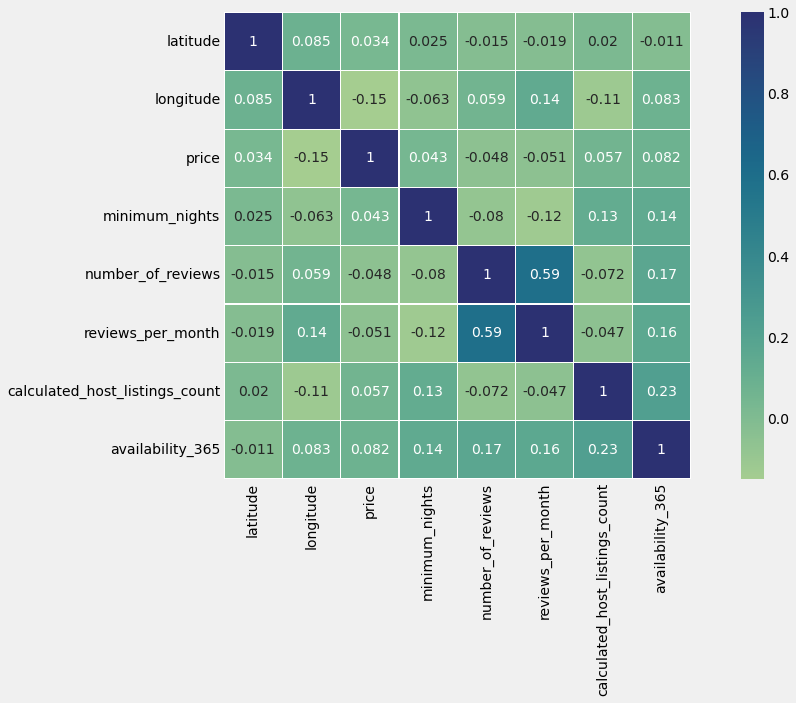

In [180]:
"""Creating List of Numerical and Categorical columns"""
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if col not in categorical]

"""Correlation of Numerical Columns"""
display(df[numerical].corr())

"""Heatmap of Numerical Variables"""
display(sns.heatmap(df[numerical].corr(), annot = True, lw = 0.2, square = True, cmap = 'crest'))



<p style="font-family:cursive;font-size:15px;color:  white"> Highest Correlation is between reviews_per_month and number_of_reviews: 0.589407 </p>

<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Make price binary
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>We need to turn the price variable from numeric into binary.</li>
<li>Let's create a variable above_average which is 1 if the price is above (or equal to) 152.</li>
</ul>
</div>

In [ ]:
"""price variable from numeric into binary."""
df_full_train['above_average'] = (df_full_train['price'] >= 152).values.astype(int)


<div style="background:#2b6684;color:white; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Question 3:
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.</li>
<li>Which of these two variables has bigger score?</li>
<li>Round it to 2 decimal digits using round(score, 2)</li>
</ul> 
</div>


In [ ]:
"""Mutual Information"""
def mutual_info_bin_score(series):
    return mutual_info_score(series, df_full_train.above_average)

mi = df_full_train[categorical].apply(mutual_info_bin_score)
mi.round(2).sort_values(ascending=False)    

room_type              0.14
neighbourhood_group    0.05
dtype: float64


<p style="font-family:cursive;font-size:15px;color:  red"> Variable room_type has the biggest score = 0.14 </p>

<div style="background:#2b6684; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Question 4:
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>Now let's train a logistic regression</li>
<li>Remember that we have two categorical variables in the data. Include them using one-hot encoding.</li>
<li>Fit the model on the training dataset.</li>
<ul>
<li>To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:</li> 
<p>model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)</p>
</ul>     
<li>Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.</li>
</ul> 
</div>

In [ ]:
"""Taking Care of Categorical variables"""
y_train = (df_train['price'] >= 152).values.astype(int)
y_val = (df_val['price'] >= 152).values.astype(int)
y_test = (df_test['price'] >= 152).values.astype(int)

del df_train['price']
del df_val['price']
del df_test['price']

numerical.remove('price')

decision = (y_val >= 152).astype(int)


In [ ]:
def calculate_accuracy(features):
    # one-hot encoding datasets
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    val_dict = df_val[features].to_dict(orient='records')

    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    """Fitting the Model on Training Set"""
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    """Using the model on validation"""
    y_pred = model.predict_proba(X_val)[:,1]

    """Setting up Decision Threshold to 0.5"""
    decision = (y_pred >= 0.5)

    """Calculating accuracy"""
    accuracy = (y_val == decision).mean()
    

    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = decision
    df_pred['actual'] = y_val
    df_pred['correct'] = df_pred.prediction == df_pred.actual
    return accuracy, df_pred
acc, df_pred = calculate_accuracy(numerical+categorical)    

print(acc)
df_pred.head()

0.786042944785276


,probability,prediction,actual,correct
0,0.033089,False,0,True
1,0.577785,True,0,False
2,0.394022,False,1,False
3,0.091863,False,0,True
4,0.798716,True,1,True


In [ ]:
all_vars_accuracy,_ = calculate_accuracy(numerical+categorical)
all_vars_accuracy.round(2)

0.79

<div style="background:#2b6684; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Question 5:
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>We have 9 features: 7 numerical features and 2 categorical.</li>
<li>Let's find the least useful one using the feature elimination technique.</li>
<li>Train a model with all these features (using the same parameters as in Q4).</li>
<li>Now exclude each feature from this set and train a model without it. Record the accuracy for each model.</li>
<li>For each feature, calculate the difference between the original accuracy and the accuracy without the feature.</li>
<li>Which of following feature has the smallest difference? </li>
<ul>
<li>neighbourhood_group</li> 
<li>room_type</li>
<li>number_of_reviews</li> 
<li>reviews_per_month</li>
</ul> 
</ul>
</div>


In [ ]:
useful_features = numerical + categorical
diff = {}
for i in useful_features:
  features = useful_features.copy()
  features.remove(i)
  acc,_ = calculate_accuracy(features)
  diff["Difference in accuracy when removing %s"%i] = all_vars_accuracy - acc

diff

{'Difference in accuracy when removing availability_365': 0.0060071574642126535,
 'Difference in accuracy when removing calculated_host_listings_count': -0.002811860940695299,
 'Difference in accuracy when removing latitude': 0.0007668711656441118,
 'Difference in accuracy when removing longitude': 0.0002556237218813706,
 'Difference in accuracy when removing minimum_nights': 0.0015337423312883347,
 'Difference in accuracy when removing neighbourhood_group': 0.03412576687116564,
 'Difference in accuracy when removing number_of_reviews': -0.0008946830265849082,
 'Difference in accuracy when removing reviews_per_month': 0.0002556237218813706,
 'Difference in accuracy when removing room_type': 0.07029652351738236}

In [ ]:
pd.DataFrame(diff.values(), index = diff.keys()).rename({0: 'differences'}, axis = 1).sort_values(by = 'differences', ascending = True).style.background_gradient('Reds')

,differences
Difference in accuracy when removing calculated_host_listings_count,-0.002812
Difference in accuracy when removing number_of_reviews,-0.000895
Difference in accuracy when removing longitude,0.000256
Difference in accuracy when removing reviews_per_month,0.000256
Difference in accuracy when removing latitude,0.000767
Difference in accuracy when removing minimum_nights,0.001534
Difference in accuracy when removing availability_365,0.006007
Difference in accuracy when removing neighbourhood_group,0.034126
Difference in accuracy when removing room_type,0.070297



<p style="font-family:cursive;font-size:15px;color:  red">Smallest Difference = number_of_reviews (0.000895) </p>

<div style="background:#2b6684; font-family:cursive;padding:0.5em;border-radius:0.2em;font-size:20px;color:yellow">Question 6:
<ul style="font-family:cursive;font-size:15px;color:  white">
<li>For this question, we'll see how to use a linear regression model from Scikit-Learn</li>
<li>We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.</li>
<li>Fit the Ridge regression model on the training data.</li>
<li>This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]</li>
<li>Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.</li>
</ul>
</div>


In [ ]:
"""Preparing Data for Linear Regression with Price Variable included"""
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

"""Creating List of Numerical and Categorical columns"""
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if col not in categorical]

"""Apply the log transformation to the price variable using the np.log1p() function."""
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)


"""Make sure that the target value ('price') is not in your dataframe."""
del df_train['price']
del df_val['price']
del df_test['price']

"""Taking care of Categorical Variables"""
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
val_dict = df_val[features].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [ ]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores[alpha] = score.round(3)
    print("RMSE with alpha = %s and not rounding to 3 digits: %s"%(alpha, score) )
print(" \nRMSE with rounding off to 3 digits")
print(scores)



RMSE with alpha = 0 and not rounding to 3 digits: 0.6250673521367153
RMSE with alpha = 0.01 and not rounding to 3 digits: 0.6250146864354896
RMSE with alpha = 0.1 and not rounding to 3 digits: 0.6250139954471717
RMSE with alpha = 1 and not rounding to 3 digits: 0.6250233985636753
RMSE with alpha = 10 and not rounding to 3 digits: 0.6259912021507164
 
RMSE with rounding off to 3 digits
{0: 0.625, 0.01: 0.625, 0.1: 0.625, 1: 0.625, 10: 0.626}


In [ ]:
print("Table of RMSE rounded to 3 digits")
pd.DataFrame(scores.values(), index = scores.keys()).rename({0: 'RMSE'}, axis = 1).sort_values(by = 'RMSE', ascending = True).style.background_gradient('Reds')

,RMSE
0.0,0.625000
0.01,0.625000
0.1,0.625000
1.0,0.625000
10.0,0.626000


<p style="font-family:cursive;font-size:15px;color:  red">$ \large alpha$ that leads to the best RMSE = $\large 0$ </p>